# Домашее задание №4

С 2015 года ежегодно проводится анонимный опрос европейских ИТ-специалистов, включающий информацию об их доходах.

Источник: https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region

В файле IT_Salary_Survey_EU_2020.csv содержаться следующие переменные:

    - Age
    - Gender
    - City
    - Position
    - Total years of experience
    - Years of experience in Germany
    - Seniority level
    - Your main technology / programming language
    - Other technologies/programming languages you use often
    - Yearly brutto salary (without bonus and stocks) in EUR
    - Yearly bonus + stocks in EUR
    - Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country
    - Annual bonus+stocks one year ago. Only answer if staying in same country
    - Number of vacation days
    - Employment status
    - Сontract duration
    - Main language at work
    - Company size
    - Company type
    - Have you lost your job due to the coronavirus outbreak?
    - Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week
    - Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR!



Задания:

    •	Постройте модель множественной линейной регрессии выбрав в качестве зависимой одну из переменных, характеризующих доход IT-специалиста. Выберите не менее 7-ми переменных в качестве независимых. Среди независимых переменных должно быть не менее 2 категориальных.
    
    •	Сформулируйте гипотезы исследования.
    
    •	Напишите уравнение регрессии.
    
    •	Оцените характеристики регрессионной модели в целом.
    
    •	Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной.
    
    •	Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной. Это очень важный пункт задания, поскольку именно в нем мы делаем выводы о том, какие факторы и как могут влиять за зарплату IT-специалиста!
    
    •	Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?
    
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

## Let's get it started

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [30]:
df = pd.read_csv('IT_Salary_Survey_EU_2020.csv', index_col=0)
df.shape

(1253, 22)

In [31]:
# Названия переменных, сгруппированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: float64
['Age' 'Yearly brutto salary (without bonus and stocks) in EUR'
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week']

Type: object
['Gender' 'City' 'Position ' 'Total years of experience'
 'Years of experience in Germany' 'Seniority level'
 'Your main technology / programming language'
 'Other technologies/programming languages you use often'
 'Yearly bonus + stocks in EUR'
 'Annual bonus+stocks one year ago. Only answer if staying in same country'
 'Number of vacation days' 'Employment status' 'Сontract duration'
 'Main language at work' 'Company size' 'Company type'
 'Have you lost your job due to the coronavirus outbreak?'
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']



In [32]:
#Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing >= 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",70.231445
"Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",63.128492
Annual bonus+stocks one year ago. Only answer if staying in same country,50.997606
Yearly bonus + stocks in EUR,33.838787
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,29.369513
Other technologies/programming languages you use often,12.529928
Your main technology / programming language,10.135674
Number of vacation days,5.426975
Years of experience in Germany,2.553871
Сontract duration,2.314445


## Независимые переменные

#### Выпишем независимые переменные
- Возраст (Age)
- Общий опыт работы (Total years of experience)
- Опыт работы в Германии (Years of experience in Germany)

Из них категориальные:
- Основной язык в работе (Main language at work)
- Размер компании (Company size)
- Пол (Gender)
- Грейд (Seniority level)

In [33]:
df = df.dropna(subset=['Age'])


#### Основной язык в работе

In [34]:
df['Main language at work'].value_counts()


Main language at work
English               1002
German                 181
Russian                 12
Italian                  3
Spanish                  3
English and German       2
Polish                   2
Русский                  2
Czech                    2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: count, dtype: int64

Оставим только английский и немецкий, случаями их комбинации (например, English and German) пренебрежём в силу их малого количества.

In [35]:
lang_dict = {'English' : 1, 'German' : 0}

df['is_main_lang_english'] = df['Main language at work'].apply(lambda x: lang_dict.get(x))
df['is_main_lang_english'].value_counts()
df = df.dropna(subset=['is_main_lang_english'])


#### Общий опыт работы

In [36]:
df['Total years of experience'].value_counts()


Total years of experience
10                                                     132
5                                                      126
6                                                       97
8                                                       86
7                                                       83
4                                                       75
12                                                      65
15                                                      60
3                                                       60
9                                                       59
2                                                       50
13                                                      41
11                                                      41
14                                                      38
1                                                       29
20                                                      27
16                            

Заменим недопустимые встречающиеся значения переменной 'Total years of experience':

In [37]:
df['Total years of experience'] = df['Total years of experience'].replace('less than year',0)
df['Total years of experience'] = df['Total years of experience'].replace('1,5',1.5)
df['Total years of experience'] = df['Total years of experience'].replace('2,5',2.5)
df['Total years of experience'] = df['Total years of experience'].replace('1 (as QA Engineer) / 11 in total', None)
df['Total years of experience'] = df['Total years of experience'].replace('15, thereof 8 as CTO', None)
df['Total years of experience'] = df['Total years of experience'].replace('16 (not as a data scientist, but as a lab scientist)', None)
df['Total years of experience'] = df['Total years of experience'].replace('6 (not as a data scientist, but as a lab scientist)', None)
df = df.dropna(subset=['Total years of experience'])
df['Total_years_of_experience'] = df['Total years of experience'].apply(lambda x: float(x))
df = df.dropna(subset=['Total_years_of_experience'])


#### Опыт работы в Германии

Аналогично убираем недопустимые принимаемые значения:

In [38]:
df['Years of experience in Germany'] = df['Years of experience in Germany'].replace('4 (in Switzerland). 0 (in Germany)', 0)
df['Years of experience in Germany'] = df['Years of experience in Germany'].replace('4 month', 0.3)
df['Years of experience in Germany'] = df['Years of experience in Germany'].replace('3 months', 0.25)
df['Years of experience in Germany'] = df['Years of experience in Germany'].replace('3 (in Poland)', 0)

df['Years of experience in Germany'] = df['Years of experience in Germany'].apply(lambda x: str(x).replace(',', '.'))
values = df['Years of experience in Germany'].values.tolist()
for i in values:
    try:
        float(i)
    except ValueError:
        df['Years of experience in Germany'] = df['Years of experience in Germany'].replace(i, None)


df = df.dropna(subset=['Years of experience in Germany'])
df['Years_of_experience_in_Germany']= df['Years of experience in Germany'].apply(lambda x: float(x))

df = df.dropna(subset=['Years_of_experience_in_Germany'])


#### Размер компании

In [39]:
df = df.rename(columns={'Company size' : 'Company_size'})
df['Company_size'].value_counts()

Company_size
1000+       411
101-1000    382
11-50       160
51-100      137
up to 10     57
Name: count, dtype: int64

Убираем пропуски:

In [40]:
df = df.dropna(subset=['Company_size'])

Создаем дамми-переменные:

In [41]:
company_size_dummies = pd.get_dummies(df.Company_size, prefix='Company_size', prefix_sep='_', dtype=int)

df = pd.concat([df, company_size_dummies], axis=1)

### Пол

In [42]:
df['Gender'].value_counts()

Gender
Male       963
Female     179
Diverse      2
Name: count, dtype: int64

In [43]:
gender_dict = {'Male' : 1, 'Female' : 0}

df['is_male'] = df['Gender'].apply(lambda x: gender_dict.get(x))
df = df.dropna(subset=['is_male'])

### Грейд


In [44]:
col = 'Seniority level'
df[col].value_counts()

Seniority level
Senior                                       520
Middle                                       331
Lead                                         155
Junior                                        71
Head                                          40
Principal                                      3
C-level executive manager                      1
Intern                                         1
Entry level                                    1
Working Student                                1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Director                                       1
Key                                            1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager                                        1
VP                                             1
No l

In [45]:
grade_dict = {
    # Intern
    'intern' : 0,
    'Entry level': 0,
    'Working Student' : 0,
    'Student': 0,

    #Junior
    'Junior' : 1,

    # Middle
    'Middle' : 2,

    # Senior
    'Senior' : 3,

    # Managers
    'Head' : 4,
    'Lead': 4,
    'Manager' : 4,
    'Work Center Manager' : 4,

    # Top managers
    'Principal' : 5,
    'C-level executive manager' : 5,
    'Director' : 5,
    'Key' : 5,
    'CTO' : 5,
    'VP' : 5
}

In [46]:
df['grade'] = df[col].apply(lambda x: grade_dict.get(x))
df = df.dropna(subset=['grade'])

In [47]:
independent_vars = [
    'Company_size_1000+',
    'Company_size_101-1000',
    'Company_size_11-50',
    'Company_size_51-100',
    'Age',
    'Total_years_of_experience',
    'Years_of_experience_in_Germany',
    'is_main_lang_english',
    'is_male',
    'grade'
]   #     'Company_size_up to 10' - референтная группа

## Зависимая переменная (brutto_salary)

In [48]:
df['brutto_salary'] = df['Yearly brutto salary (without bonus and stocks) in EUR'].apply(lambda x : int(x))

# Удалим особо исключительные значения
df = df.drop(df[df.brutto_salary == 99999999999].index)
df = df.drop(df[df.brutto_salary == 500000000].index)

In [49]:
df['brutto_salary'].describe()


count      1130.000000
mean      72326.361062
std       32705.435988
min       10001.000000
25%       60000.000000
50%       70000.000000
75%       80000.000000
max      850000.000000
Name: brutto_salary, dtype: float64

In [50]:
df['brutto_salary'].median()

70000.0

/tmp/ipykernel_5515/3698175039.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.brutto_salary, fit=stats.norm)


<Axes: xlabel='brutto_salary', ylabel='Density'>

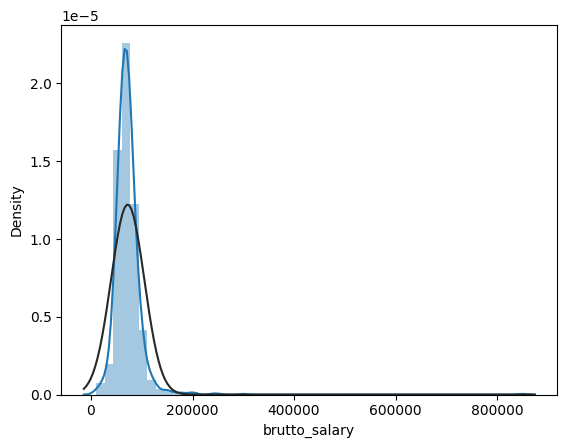

In [51]:
sns.distplot(df.brutto_salary, fit=stats.norm)


In [52]:
print('Skewness: {:.4f}'.format(df['brutto_salary'].skew()))
print('Kurtosis: {:.4f}'.format(df['brutto_salary'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['brutto_salary'].quantile(0.75) - df['brutto_salary'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['brutto_salary'].quantile(0.9)/df['brutto_salary'].quantile(0.1)))

Skewness: 12.8098
Kurtosis: 286.6223
Quartile Deviation: 10000.0000
Decile Ratio: 1.9000


In [53]:
stats.kstest(df.brutto_salary, 'norm', args=(df.brutto_salary.mean(), df.brutto_salary.std()))

KstestResult(statistic=0.18458807593399418, pvalue=3.574308557505665e-34, statistic_location=85000, statistic_sign=1)

Зависимая переменная "brutto_salary" имеет распределение отличное от нормального (pvalue < 0.05). Также оно асимметрично (сдвиг в сторону меньших значений) и характеризуется пиковостью. Среднее значение - 72.5 тысяч евро, стандартное отклонение довольно высокое - 33 тысячи евро. Медиана  - 70 тысяч евро. Межквартильная широта - 10 тысяч евро, что также характеризует довольно большой разброс серединных 50% значений относительно медианы. Децильное отношение - 1.9.

## Гипотезы

О зависимой переменной:
- H0 (нулевая гипотеза): Средний доход IT-специалиста не зависит от возраста, общего опыта работы, опыта работы в Германии, размера компании, основного языка в работе, пола и грейда.
- H1 (альтернативная гипотеза): Существует статистически значимая зависимость между выбранными факторами и доходом IT-специалиста.

О независимых переменных:
- H0 (нулевая гипотеза): Каждая из независимых переменных не оказывает статистически значимого влияния на доход IT-специалиста.
- H1 (альтернативная гипотеза): Некоторые из независимых переменных оказывают статистически значимое влияние на доход IT-специалиста.








## Формирование модели

In [54]:
import statsmodels.api as sm

df.shape

(1130, 33)

In [55]:
y = df['brutto_salary']
x_mult = df[independent_vars]
x_mult_constant = sm.add_constant(x_mult)

In [56]:
df.head(25)

model2 = sm.OLS(y, x_mult_constant).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          brutto_salary   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     23.70
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           8.49e-41
Time:                        13:07:27   Log-Likelihood:                -13241.
No. Observations:                1130   AIC:                         2.650e+04
Df Residuals:                    1119   BIC:                         2.656e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Характеристики регрессионной модели и значимость коэффициентов

In [57]:
print('R^2 = {:f}'.format(model2.rsquared))
print('F-test significance = {:f}'.format(model2.f_pvalue))

R^2 = 0.174763
F-test significance = 0.000000


Модель статистически незначима. Объясняет только 17,5% вариации значений зависимой переменной.

In [58]:
f'Статистически значимые параметры модели: {model2.pvalues[model2.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'Years_of_experience_in_Germany' 'is_main_lang_english' 'is_male'\n 'grade']"

In [59]:
f'Статистически не значимые параметры модели: {model2.pvalues[model2.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['Company_size_1000+' 'Company_size_101-1000' 'Company_size_11-50'\n 'Company_size_51-100' 'Age' 'Total_years_of_experience']"

Уравнение модели:

In [60]:
l = []
for (param, index) in zip(model2.params[1:], model2.params.index[1:]):
    l.append('{:.2f} * {}'.format(param, index))

print('Y = {:2f} +\n{}'.format(model2.params[0], ' + \n'.join(l)))

Y = 15520.618061 +
6880.87 * Company_size_1000+ + 
3465.53 * Company_size_101-1000 + 
-2611.67 * Company_size_11-50 + 
-3067.60 * Company_size_51-100 + 
174.68 * Age + 
19.35 * Total_years_of_experience + 
734.85 * Years_of_experience_in_Germany + 
6766.16 * is_main_lang_english + 
7699.53 * is_male + 
11983.87 * grade


/tmp/ipykernel_5515/1667814345.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Y = {:2f} +\n{}'.format(model2.params[0], ' + \n'.join(l)))


- Количество сотрудников компании не влияет на зарплату (статистически не значим)о.
- Возраст не оказывает влияние на зарплату (статистически не значим).
- Опыт работы тоже статистически не значим.
- **С каждым годом стажа в Германии** зарплата увеличивается на **734.8479**.
- **Владение английским языком**, как основным, увеличивает зарплату на **6766.1570**.
- **Мужчины** получают в среднем зарплаты на **7699.5344** больше.
- **С повышением уровня квалификации** зарплата увеличивается на **11980**.



## Диагностика модели

In [61]:
p = stats.kstest(model2.resid, 'norm', args=(model2.resid.mean(), model2.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


/tmp/ipykernel_5515/1191203255.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2.resid, fit=stats.norm)


<Axes: ylabel='Density'>

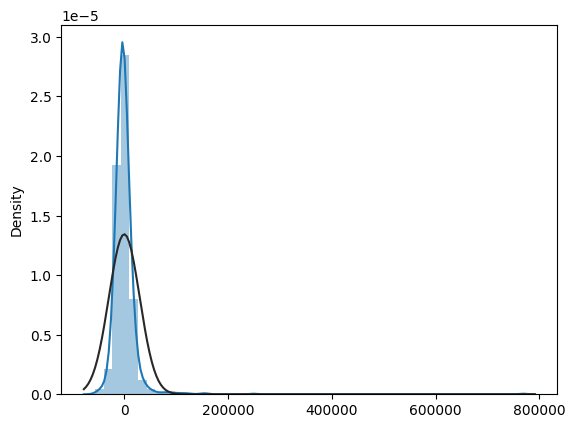

In [62]:
sns.distplot(model2.resid, fit=stats.norm)

Распределение остатков отличается от нормального.

### Гетероскедастичность

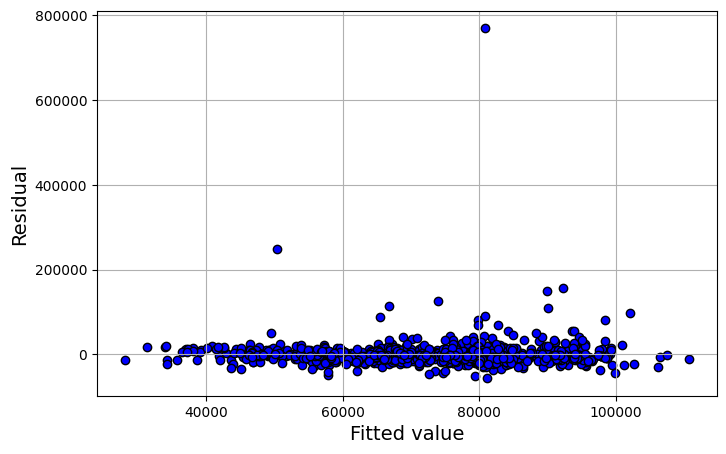

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(x=model2.fittedvalues, y=model2.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

Наблюдается взаимосвязь между остатками и спредсказанными значениями зависимой переменной. Следовательно существует проблема гетероскедастичности.

### Мультиколлинеарность

In [64]:
vifs = np.array([vif(model2.model.exog, i) for i in range(model2.model.exog.shape[1])])

In [65]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model2.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
8,1.078237,is_male
7,1.206882,is_main_lang_english
9,1.323222,grade
5,1.334450,Total_years_of_experience
6,1.604067,Years_of_experience_in_Germany
4,1.783194,Age
3,3.151270,Company_size_51-100
2,3.474799,Company_size_11-50
1,5.536195,Company_size_101-1000
0,5.650214,Company_size_1000+


Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует.

### Выбросы и влияющие наблюдения

In [66]:
influence = model2.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_Company_size_1000+,dfb_Company_size_101-1000,dfb_Company_size_11-50,dfb_Company_size_51-100,dfb_Age,dfb_Total_years_of_experience,dfb_Years_of_experience_in_Germany,dfb_is_main_lang_english,dfb_is_male,dfb_grade,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
Timestamp,,,,,,,,,,,,,,,,,
01/01/2021 10:51:57,-0.001838,0.001100,-0.003570,0.000989,0.000622,0.007643,-0.001457,-0.001141,-0.000089,-0.000465,-0.011865,3.382214e-05,-0.260759,0.005442,-0.019288,-0.260651,-0.019280
01/01/2021 13:40:08,0.000816,-0.000465,0.000153,0.000186,0.000141,-0.000551,-0.000004,0.001802,0.000316,-0.000220,-0.001662,7.704417e-07,-0.034058,0.007253,-0.002911,-0.034042,-0.002910
01/12/2020 00:06:49,0.013531,0.007077,0.001085,0.001151,0.001261,-0.004001,-0.004374,-0.004204,-0.028924,-0.027463,0.016071,2.015837e-04,0.414344,0.012751,0.047089,0.414190,0.047072
01/12/2020 00:16:18,0.003543,-0.000019,-0.006220,0.000524,0.000356,-0.002851,0.001469,0.009535,0.000303,-0.004404,-0.003740,4.370026e-05,-0.365328,0.003589,-0.021925,-0.365187,-0.021916
01/12/2020 00:20:42,-0.000352,0.000272,0.000199,0.000090,0.004223,0.000993,-0.000381,-0.002125,0.000504,0.001616,-0.002055,6.812465e-06,0.089739,0.009220,0.008657,0.089699,0.008653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2020 23:38:05,0.000393,0.006604,0.000758,0.000254,0.000471,0.000764,0.002763,-0.004705,0.003339,0.007184,-0.009387,4.349823e-05,0.336322,0.004212,0.021874,0.336189,0.021866
30/12/2020 02:23:59,-0.012918,0.007431,-0.007539,0.005401,0.004112,0.014971,0.008601,0.002575,-0.002348,0.065638,-0.053139,7.211422e-04,-0.795439,0.012382,-0.089065,-0.795309,-0.089050
30/12/2020 13:18:32,-0.000117,0.000023,0.000037,0.000066,-0.001521,0.000368,-0.000113,0.000594,-0.000012,-0.000303,-0.000522,8.799802e-07,-0.033664,0.008469,-0.003111,-0.033649,-0.003110


In [67]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
#потенциальные влияющие наблюдения

Timestamp
06/12/2020 21:51:21   -7.734182
26/11/2020 17:08:47    3.146785
Name: dffits, dtype: float64

In [68]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
#потенциальные выбросы

Timestamp
30/11/2020 13:17:39     3.060062
24/11/2020 21:36:24     3.297085
25/11/2020 13:16:43     3.726523
27/11/2020 13:02:41     3.846090
30/11/2020 14:36:32     4.240114
26/11/2020 22:41:33     5.062658
25/11/2020 15:53:21     5.315555
25/11/2020 13:26:21     8.400276
26/11/2020 17:08:47    25.853072
Name: standard_resid, dtype: float64

## Выводы
- На доход IT-специалиста оказывают статистическую значимость его пол, опыт работы в Германии, знание английского языка и уровень квалификации. У них положительные коэффициенты, то есть с увеличением этих характеристик, доход будет расти (в случае с полом, у мужчин выше зарплаты, чем у женщин).
- Модель статистически незначима, объясняет всего 17,5% вариации значений зависимой переменной.
- Неожиданными результатами можно выделить отсутствие влияния опыта работы и размера компании на зарплату программистов.

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 23:55 16 ноября.